In [1]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import cross_validate, train_test_split
import keras
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
# Read the original dataset
df = pd.read_csv("data/mpg.csv", header=0)
# Convert the displacement column as float
df["displacement"] = df["displacement"].astype(float)
y = df['mpg']
X = df.drop(columns=['mpg', 'name'])

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [5]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

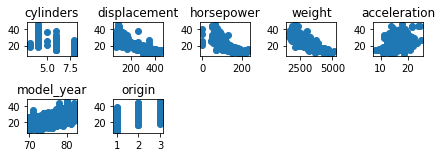

In [6]:
plt.figure()
for i in range(1, 8):
    number = 450 + i
    ax1 = plt.subplot(number)
    plt.title(list(df)[i])
    ax1.scatter(df[df.columns[i]], y)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [7]:
#split the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1)

In [8]:
# Scale the data for convergency optimization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Build a 2leyer fully connected DNN with 10 and 5 units respectively
def model(X, hidden_w1, b1, hiddenw2, b2, ow, b3):
    # 1st hidden layer
    a1 = tf.nn.relu(tf.add(tf.matmul(hidden_w1, X), b1))
    # 2nd hidden layer
    a2 = tf.nn.relu(tf.matmul(hidden_w2, a1) + b2)
    # output
    output = tf.matmul(ow, a2) + b3
    return output

In [10]:
# Create X, y
X = tf.placeholder(dtype="float32", shape=[7, None])
Y = tf.placeholder(dtype="float32", shape=None)
# Create 1st hidden layer
hidden_w1 = tf.get_variable(shape=[10, 7], initializer=tf.contrib.layers.xavier_initializer(), name='w1')
b1 = tf.Variable(tf.zeros([10, 1]))
# Create 2nd hidden layer
hidden_w2 = tf.get_variable(shape=[10, 10], initializer=tf.contrib.layers.xavier_initializer(), name='w2')
b2 = tf.Variable(tf.zeros([10, 1]))
# Create output
ow = tf.get_variable(shape=[1, 10], initializer=tf.contrib.layers.xavier_initializer(), name='ow')
b3 = tf.Variable(tf.zeros([1]))
output = model(X, hidden_w1, b1, hidden_w2, b2, ow, b3)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
# cost penlty
penlty = 0*tf.reduce_sum(tf.square(ow)) + 0*tf.reduce_sum(tf.square(hidden_w1))\
         + tf.reduce_sum(tf.square(hidden_w2))
# create alpha
alpha = tf.placeholder(dtype="float32")
# create cost
cost = tf.reduce_mean(tf.square(tf.subtract(output, tf.reshape(Y, (1, -1)))))/2 + penlty*alpha/2

In [12]:
# construct an optimizer
train_op = tf.train.AdamOptimizer(0.005).minimize(cost)

In [13]:
# Launch the graph in a session
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(1, 20000):
        #for x1, y1 in zip(X_train, y_train):
        sess.run([train_op, cost], feed_dict={X: X_train.reshape(7,-1), Y: y_train, alpha: 0})
        if i % 100 == 0:
            print("eohcpe = ", i)
            print("train loss:", sess.run(cost, feed_dict={X: X_train.reshape(7, -1), Y: y_train, alpha:0}),
                  "Val loss:",  sess.run(cost, feed_dict={X: X_test.reshape(7, -1), Y:y_test, alpha:0}))
            print("------------------------------")
        y_pred = sess.run(output, feed_dict={X: X_train.reshape(7, -1), Y: y_train, alpha:0})
        y_pred_test = sess.run(output, feed_dict={X: X_test.reshape(7, -1), Y:y_test, alpha:0})

eohcpe =  100
train loss: 38.54899 Val loss: 38.75561
------------------------------
eohcpe =  200
train loss: 32.69032 Val loss: 35.35101
------------------------------
eohcpe =  300
train loss: 30.64594 Val loss: 34.39362
------------------------------
eohcpe =  400
train loss: 29.345835 Val loss: 33.00377
------------------------------
eohcpe =  500
train loss: 28.67694 Val loss: 32.14682
------------------------------
eohcpe =  600
train loss: 28.344093 Val loss: 31.89341
------------------------------
eohcpe =  700
train loss: 28.098207 Val loss: 32.090076
------------------------------
eohcpe =  800
train loss: 27.722551 Val loss: 32.24636
------------------------------
eohcpe =  900
train loss: 27.369099 Val loss: 32.684586
------------------------------
eohcpe =  1000
train loss: 27.085085 Val loss: 32.88293
------------------------------
eohcpe =  1100
train loss: 26.86416 Val loss: 33.114872
------------------------------
eohcpe =  1200
train loss: 26.73188 Val loss: 33.32902

eohcpe =  9600
train loss: 13.072163 Val loss: 40.264286
------------------------------
eohcpe =  9700
train loss: 13.080478 Val loss: 40.41828
------------------------------
eohcpe =  9800
train loss: 13.068957 Val loss: 40.162
------------------------------
eohcpe =  9900
train loss: 13.054872 Val loss: 40.09009
------------------------------
eohcpe =  10000
train loss: 13.042254 Val loss: 40.28627
------------------------------
eohcpe =  10100
train loss: 13.043369 Val loss: 40.520397
------------------------------
eohcpe =  10200
train loss: 13.035436 Val loss: 40.635334
------------------------------
eohcpe =  10300
train loss: 13.038183 Val loss: 40.41954
------------------------------
eohcpe =  10400
train loss: 13.022201 Val loss: 40.50957
------------------------------
eohcpe =  10500
train loss: 13.071338 Val loss: 40.785755
------------------------------
eohcpe =  10600
train loss: 13.014731 Val loss: 40.572372
------------------------------
eohcpe =  10700
train loss: 13.01

eohcpe =  19000
train loss: 12.34225 Val loss: 43.28752
------------------------------
eohcpe =  19100
train loss: 12.456744 Val loss: 43.771923
------------------------------
eohcpe =  19200
train loss: 12.333415 Val loss: 43.375248
------------------------------
eohcpe =  19300
train loss: 12.362605 Val loss: 43.457767
------------------------------
eohcpe =  19400
train loss: 12.385222 Val loss: 43.365982
------------------------------
eohcpe =  19500
train loss: 12.355077 Val loss: 43.46793
------------------------------
eohcpe =  19600
train loss: 12.327383 Val loss: 43.459915
------------------------------
eohcpe =  19700
train loss: 12.33979 Val loss: 43.344017
------------------------------
eohcpe =  19800
train loss: 12.326117 Val loss: 43.31651
------------------------------
eohcpe =  19900
train loss: 12.332139 Val loss: 43.325905
------------------------------


0.8536526221104772

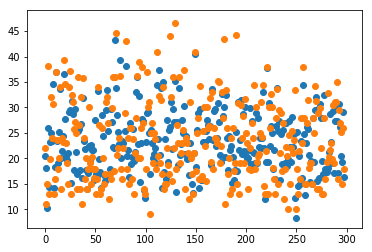

In [14]:
plt.scatter(range(298), y_pred)
plt.scatter(range(298), y_train)
np.sum(np.sqrt(y_pred.reshape(298,) - y_train))/y_train.shape[0]

1.3528734507017526

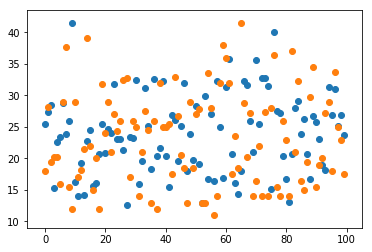

In [15]:
plt.scatter(range(100), y_pred_test)
plt.scatter(range(100), y_test)
np.sum(np.sqrt(y_pred_test.reshape(100,) - y_test))/y_test.shape[0]